In [1]:
import requests
from config import API_KEY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
eastCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R10_DPG.W"
midwest = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R20_DPG.W"
gulfCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R30_DPG.W"
rockyMountain = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R40_DPG.W"
westCoast = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.EMM_EPM0_PTE_R50_DPG.W"

In [3]:
eastCoast_df = pd.DataFrame(requests.get(eastCoast).json()['series'][0]['data'])
midwest_df = pd.DataFrame(requests.get(midwest).json()['series'][0]['data'])
gulfCoast_df = pd.DataFrame(requests.get(gulfCoast).json()['series'][0]['data'])
rockyMountain_df = pd.DataFrame(requests.get(rockyMountain).json()['series'][0]['data'])
westCoast_df = pd.DataFrame(requests.get(westCoast).json()['series'][0]['data'])

In [4]:
eastCoast_df.rename(columns = {0:"week", 1:"price_eastCoast"}, inplace = True)
midwest_df.rename(columns = {0:"week", 1:"price_midwest"}, inplace = True)
gulfCoast_df.rename(columns = {0:"week", 1:"price_gulfCoast"}, inplace = True)
rockyMountain_df.rename(columns = {0:"week", 1:"price_rockyMountain"}, inplace = True)
westCoast_df.rename(columns = {0:"week", 1:"price_westCoast"}, inplace = True)

In [5]:
eastCoast_df['week'] = pd.to_datetime(eastCoast_df['week'])
midwest_df['week'] = pd.to_datetime(midwest_df['week'])
gulfCoast_df['week'] = pd.to_datetime(gulfCoast_df['week'])
rockyMountain_df['week'] = pd.to_datetime(rockyMountain_df['week'])
westCoast_df['week'] = pd.to_datetime(westCoast_df['week'])

In [6]:
prices_df = eastCoast_df.merge(midwest_df , on = "week", suffixes=('', ''))\
            .merge(gulfCoast_df , on = "week", suffixes=('', ''))\
            .merge(rockyMountain_df , on = "week", suffixes=('', ''))\
            .merge(westCoast_df , on = "week", suffixes=('', ''))

In [7]:
regions = ["eastCoast", "midwest", "gulfCoast", "rockyMountain", "westCoast"]
for region in regions:
    prices_df['change_' + region] = prices_df['price_' + region].diff()

In [8]:
prices_df

,week,price_eastCoast,price_midwest,price_gulfCoast,price_rockyMountain,price_westCoast,change_eastCoast,change_midwest,change_gulfCoast,change_rockyMountain,change_westCoast
0,2020-11-16,2.152,2.021,1.858,2.300,2.864,NaN,NaN,NaN,NaN,NaN
1,2020-11-09,2.127,2.025,1.823,2.304,2.863,-0.025,0.004,-0.035,0.004,-0.001
2,2020-11-02,2.149,2.026,1.862,2.320,2.869,0.022,0.001,0.039,0.016,0.006
3,2020-10-26,2.173,2.069,1.908,2.340,2.882,0.024,0.043,0.046,0.020,0.013
4,2020-10-19,2.196,2.057,1.905,2.359,2.887,0.023,-0.012,-0.003,0.019,0.005
...,...,...,...,...,...,...,...,...,...,...,...
1437,1993-05-03,1.062,1.073,1.084,1.161,1.161,-0.007,-0.018,-0.004,0.018,-0.010
1438,1993-04-26,1.059,1.078,1.081,1.169,1.157,-0.003,0.005,-0.003,0.008,-0.004
1439,1993-04-19,1.054,1.067,1.081,1.120,1.155,-0.005,-0.011,0.000,-0.049,-0.002
1440,1993-04-12,1.047,1.077,1.071,1.118,1.154,-0.007,0.010,-0.010,-0.002,-0.001


In [9]:
prices_df.dropna(inplace =True)

<AxesSubplot:xlabel='week'>

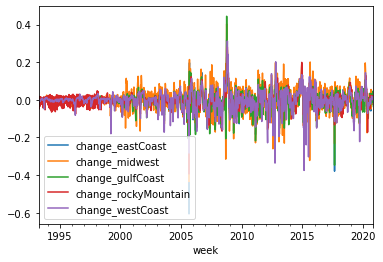

In [10]:
prices_df.plot(x = 'week', y=["change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"])

In [11]:
WTI = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.RWTC.W"

In [12]:
WTI_df = pd.DataFrame(requests.get(WTI).json()['series'][0]['data'])

In [13]:
WTI_df.rename(columns = {0:"week", 1:"WTI_spotPrice"}, inplace = True)

In [14]:
WTI_df['week'] = pd.to_datetime(WTI_df['week']) + datetime.timedelta(days = 3)

In [15]:
WTI_df ['change_WTI'] = WTI_df['WTI_spotPrice'].diff()

In [16]:
#normalize WTI_change so that it is about the size of gas Price changes (100 is somewhat arbitrary)
WTI_df ['change_WTI_normalized'] = WTI_df ['change_WTI'] / 100

In [17]:
combined_df = prices_df.merge(WTI_df, on = 'week', suffixes=("",""))

In [18]:
petroleum_export = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.WTTEXUS2.W"
petroleum_import = f"http://api.eia.gov/series/?api_key={API_KEY}&series_id=PET.WTTIMUS2.W"

In [19]:
export_df = pd.DataFrame(requests.get(petroleum_export).json()['series'][0]['data'])
import_df = pd.DataFrame(requests.get(petroleum_import).json()['series'][0]['data'])

In [20]:
export_df.rename(columns = {0:"week", 1:"export_barrels"}, inplace = True)
import_df.rename(columns = {0:"week", 1:"import_barrels"}, inplace = True)

In [21]:
export_df['week'] = pd.to_datetime(eastCoast_df['week'])
import_df['week'] = pd.to_datetime(midwest_df['week'])

In [22]:
#normalize number of import/export barrels (1000000 is somehwat arbitrary)
export_df['export_barrels_normalized'] = export_df['export_barrels']/100000
import_df['import_barrels_normalized'] = import_df['import_barrels']/100000

In [23]:
combined_df = combined_df.merge(export_df, on = 'week', suffixes=("",""))\
          .merge(import_df, on = 'week', suffixes=("",""))

In [24]:
combined_df

,week,price_eastCoast,price_midwest,price_gulfCoast,price_rockyMountain,price_westCoast,change_eastCoast,change_midwest,change_gulfCoast,change_rockyMountain,change_westCoast,WTI_spotPrice,change_WTI,change_WTI_normalized,export_barrels,export_barrels_normalized,import_barrels,import_barrels_normalized
0,2020-11-09,2.127,2.025,1.823,2.304,2.863,-0.025,0.004,-0.035,0.004,-0.001,37.71,-2.95,-0.0295,7566,0.07566,7386,0.07386
1,2020-11-02,2.149,2.026,1.862,2.320,2.869,0.022,0.001,0.039,0.016,0.006,37.32,-0.39,-0.0039,7568,0.07568,6767,0.06767
2,2020-10-26,2.173,2.069,1.908,2.340,2.882,0.024,0.043,0.046,0.020,0.013,40.43,3.11,0.0311,8082,0.08082,7966,0.07966
3,2020-10-19,2.196,2.057,1.905,2.359,2.887,0.023,-0.012,-0.003,0.019,0.005,40.33,-0.10,-0.0010,8028,0.08028,6968,0.06968
4,2020-10-12,2.209,2.089,1.914,2.367,2.895,0.013,0.032,0.009,0.008,0.008,40.19,-0.14,-0.0014,7525,0.07525,7321,0.07321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1993-05-03,1.062,1.073,1.084,1.161,1.161,-0.007,-0.018,-0.004,0.018,-0.010,20.30,-0.17,-0.0017,981,0.00981,9418,0.09418
1437,1993-04-26,1.059,1.078,1.081,1.169,1.157,-0.003,0.005,-0.003,0.008,-0.004,19.95,-0.35,-0.0035,986,0.00986,8715,0.08715
1438,1993-04-19,1.054,1.067,1.081,1.120,1.155,-0.005,-0.011,0.000,-0.049,-0.002,20.28,0.33,0.0033,986,0.00986,7976,0.07976
1439,1993-04-12,1.047,1.077,1.071,1.118,1.154,-0.007,0.010,-0.010,-0.002,-0.001,20.37,0.09,0.0009,986,0.00986,8956,0.08956


In [25]:
#train test split
train_size = int(0.8 * len(prices_df))
combined_df_train = combined_df.iloc[0:train_size]
combined_df_test = combined_df.iloc[train_size:]

In [26]:
#function for making windows
def make_windows(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [27]:
time_steps = 4
X_train, y_train = make_windows(combined_df_train[['export_barrels_normalized', 'import_barrels_normalized', 'change_WTI_normalized', "change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"]], combined_df_train[['export_barrels_normalized', 'import_barrels_normalized', 'change_WTI_normalized', "change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"]], time_steps)
X_test, y_test = make_windows(combined_df_test[['export_barrels_normalized', 'import_barrels_normalized', 'change_WTI_normalized', "change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"]], combined_df_test[['export_barrels_normalized', 'import_barrels_normalized', 'change_WTI_normalized', "change_eastCoast", "change_midwest", "change_gulfCoast", "change_rockyMountain", "change_westCoast"]], time_steps)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1148, 4, 8) (1148, 8) (285, 4, 8) (285, 8)


In [28]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers


/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [38]:
model = keras.models.Sequential([
    keras.Input(shape=(X_train.shape[1],X_train.shape[2])),
])
model.add(keras.Input(shape=(None,8)))
model.add(
    layers.GRU(8,return_sequences=False, activation='relu')
)
model.add(layers.Dense(8))

In [39]:
model.output_shape


(None, 8)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         multiple                  0         
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 408       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10,verbose=2)
model.evaluate(X_test,y_test, batch_size=32, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
